## ANALYSIS UNEMPLOYMENT IN INDIA DURING COVID PERIOD 

In [170]:
#IMPORT ALL NECCESSARY PACKAGES

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar 
import plotly.graph_objects as go


In [ ]:
#IMPORT THE CSV FILE INTO THE WORK ENVIRONMENT

In [171]:
df = pd.read_csv('Unemployment in India.csv')

In [172]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
#CHECK FOR NULL VALUES IN THE DATASET
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [174]:
df.dropna(inplace = True)

In [175]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [176]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [177]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [178]:
df[' Frequency'].nunique()

2

In [ ]:
# CHECKS THE NUMBER OF REGIONS IN THE COLUMN CALLED REGION

In [179]:
df['Region'].nunique()

28

In [1]:
# CHECK FOR DUPLICATES

In [180]:
df.duplicated().any()

False

In [181]:
df.Region.value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [182]:
df[' Date'].unique()

array([' 31-05-2019', ' 30-06-2019', ' 31-07-2019', ' 31-08-2019',
       ' 30-09-2019', ' 31-10-2019', ' 30-11-2019', ' 31-12-2019',
       ' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020'], dtype=object)

In [ ]:
# SEPERATING MONTHS FROM DATE

In [183]:
df[' Date'] = pd.to_datetime(df[' Date'],dayfirst = True)


In [184]:
df['month_int'] = df[' Date'].dt.month
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


In [ ]:
#CHANGE INTERGERS OF MONTH TO REAL NAME OF MONTH

In [185]:
df['month'] = df['month_int'].apply(lambda x: calendar.month_name[x])
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,June
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,July
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,August
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,September


In [186]:
# CHECK THE MONTHS OF THE YEAR AVAILABLE IN THE COLUMN 'MONTH'
df['month'].unique()

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

## Data Visualization of Unemployment in comparison to Labour Participation

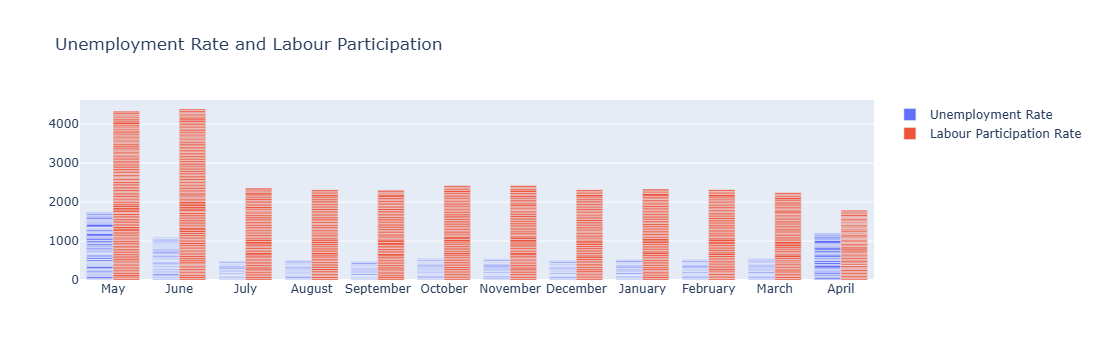

In [187]:
month = df.month
unemployment_rate = df[' Estimated Unemployment Rate (%)']
labour_participation_rate = df[' Estimated Labour Participation Rate (%)']

fig = go.Figure()

fig.add_trace(go.Bar(x = month,y = unemployment_rate,name = 'Unemployment Rate'))
fig.add_trace(go.Bar(x = month,y = labour_participation_rate,name = 'Labour Participation Rate'))

fig.update_layout(title = 'Unemployment Rate and Labour Participation',
                     xaxis = {'categoryorder':'array','categoryarray':['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April']}      )
fig.show()

In [188]:
import plotly.express as px

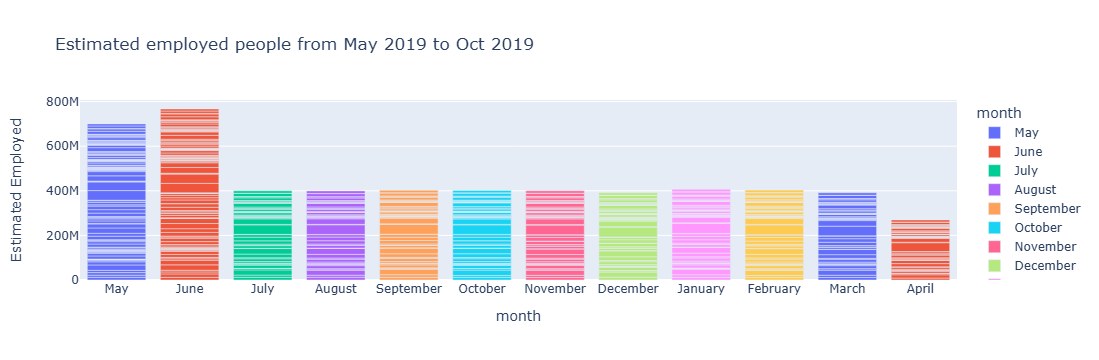

In [189]:
fig = px.bar(df,x='month',y=' Estimated Employed',color='month',
            category_orders ={'month':['May', 'June', 'July', 'August', 'September', 'October',
       'November']},
            title='Estimated employed people from May 2019 to Oct 2019')
fig.show()

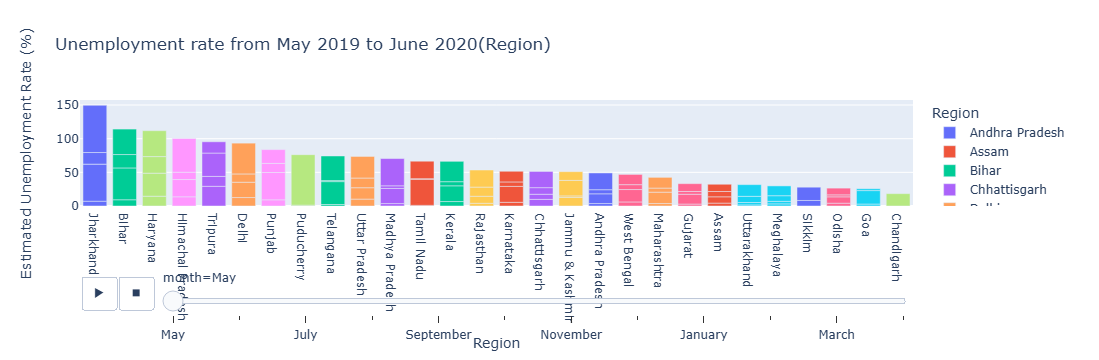

In [190]:
# Bar plot Unemployment Rate (monthly)

fig = px.bar(df,x='Region',y=' Estimated Unemployment Rate (%)',animation_frame='month',color='Region',
            title='Unemployment rate from May 2019 to June 2020(Region)')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [191]:
region = df.groupby(['Region'])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
region = pd.DataFrame(region).reset_index()

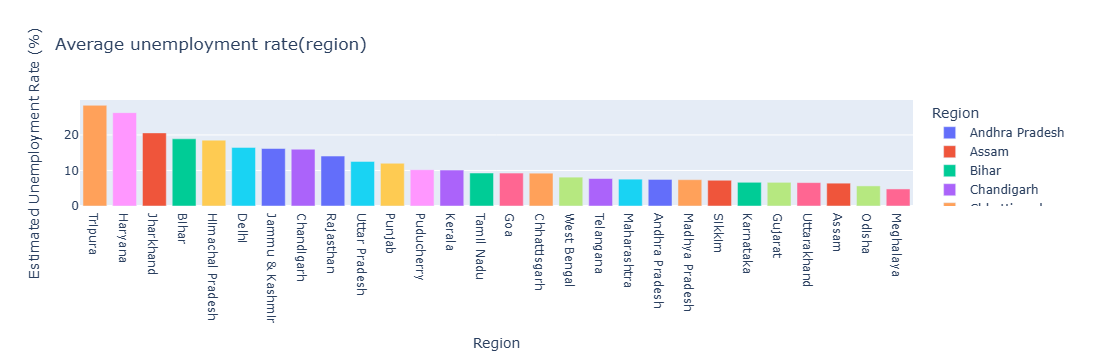

In [192]:
fig = px.bar(region,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Average unemployment rate(region)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [193]:
area = df.groupby(['Area'])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
area = pd.DataFrame(area).reset_index()

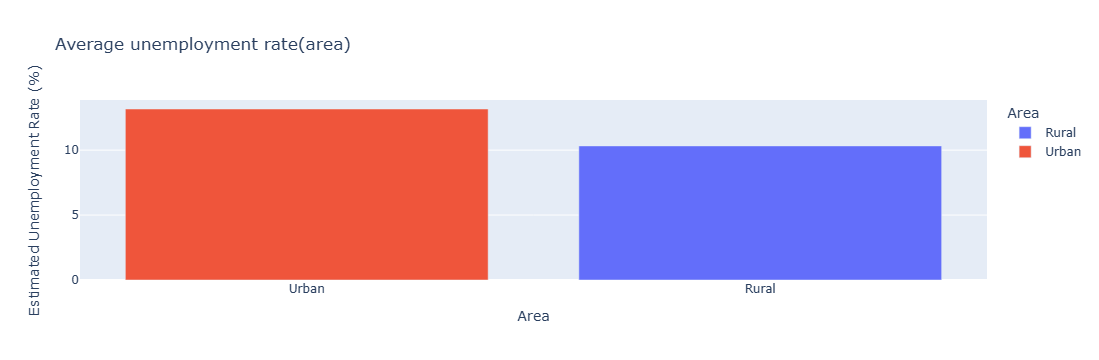

In [194]:
fig = px.bar(area,x='Area',y=' Estimated Unemployment Rate (%)',color='Area',title='Average unemployment rate(area)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [195]:
unemployment =df.groupby(['Area','Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
unemployment.head()

,Area,Region,Estimated Unemployment Rate (%)
0,Rural,Andhra Pradesh,5.526429
1,Rural,Assam,4.490833
2,Rural,Bihar,16.770000
3,Rural,Chhattisgarh,6.628571
4,Rural,Delhi,15.258571


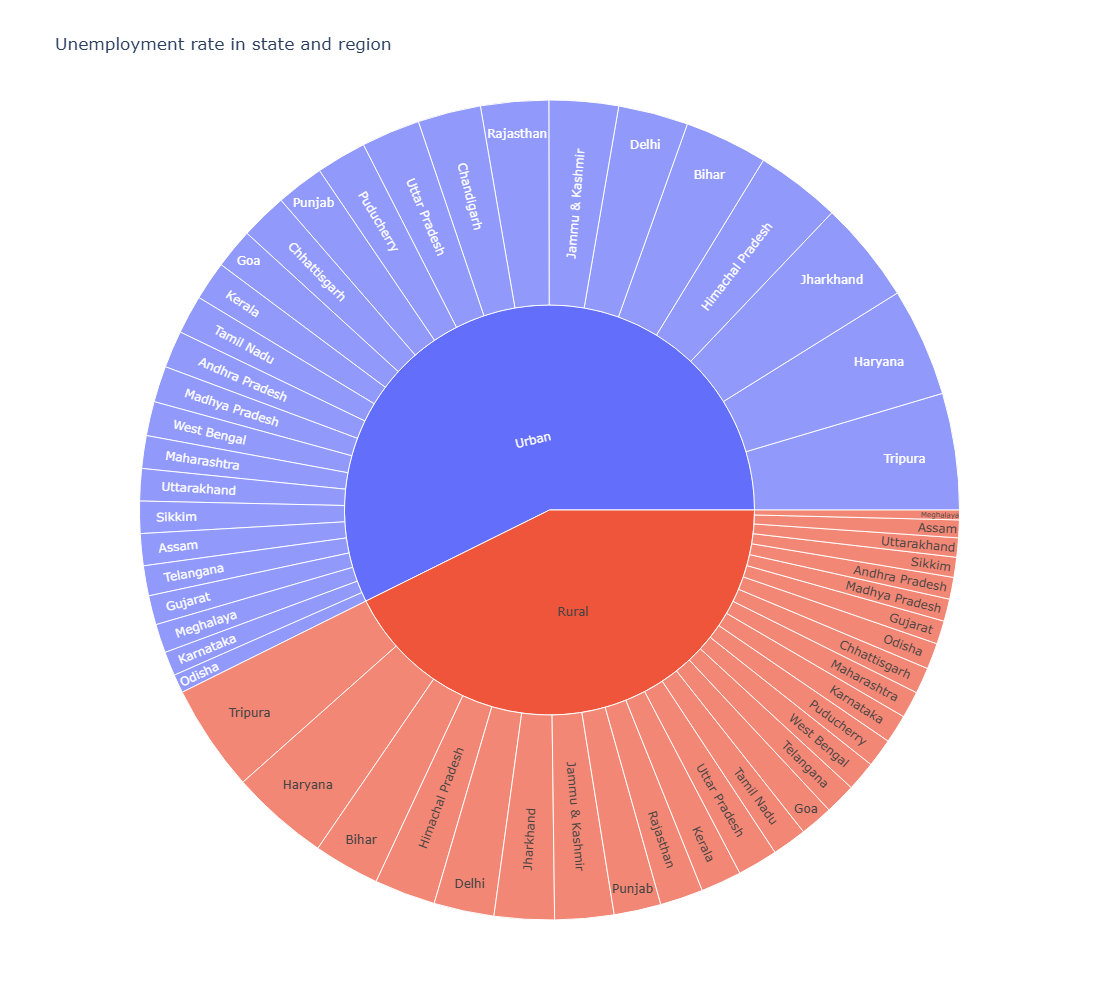

In [196]:
fig = px.sunburst(unemployment,path=['Area','Region'],values=' Estimated Unemployment Rate (%)',
                 title ='Unemployment rate in state and region',height=1000)
fig.show()

In [197]:
before_lockdown = df[(df['month_int'] >= 1) & (df['month_int'] <= 3)]
after_lockdown = df[(df['month_int'] >= 3) & (df['month_int'] <= 6)]

In [198]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'month_int', 'month'],
      dtype='object')

In [199]:
# Group by Region and calculate the mean unemployment rate before and after lockdown
before_lockdown = before_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
after_lockdown = after_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Merge the two dataframes on 'Region'
unemployment_comparison = pd.merge(before_lockdown, after_lockdown, on='Region', suffixes=(' before lockdown', ' after lockdown'))

# Calculate the change in unemployment rate before and after lockdown
unemployment_comparison['Change in Unemployment Rate'] = unemployment_comparison[' Estimated Unemployment Rate (%) after lockdown'] - unemployment_comparison[' Estimated Unemployment Rate (%) before lockdown']

# Display the result
unemployment_comparison.head()


,Region,Estimated Unemployment Rate (%) before lockdown,Estimated Unemployment Rate (%) after lockdown,Change in Unemployment Rate
0,Andhra Pradesh,6.243333,10.433333,4.190000
1,Assam,6.480000,6.652727,0.172727
2,Bihar,14.276667,25.475833,11.199167
3,Chandigarh,19.366667,14.850000,-4.516667
4,Chhattisgarh,8.683333,11.893333,3.210000


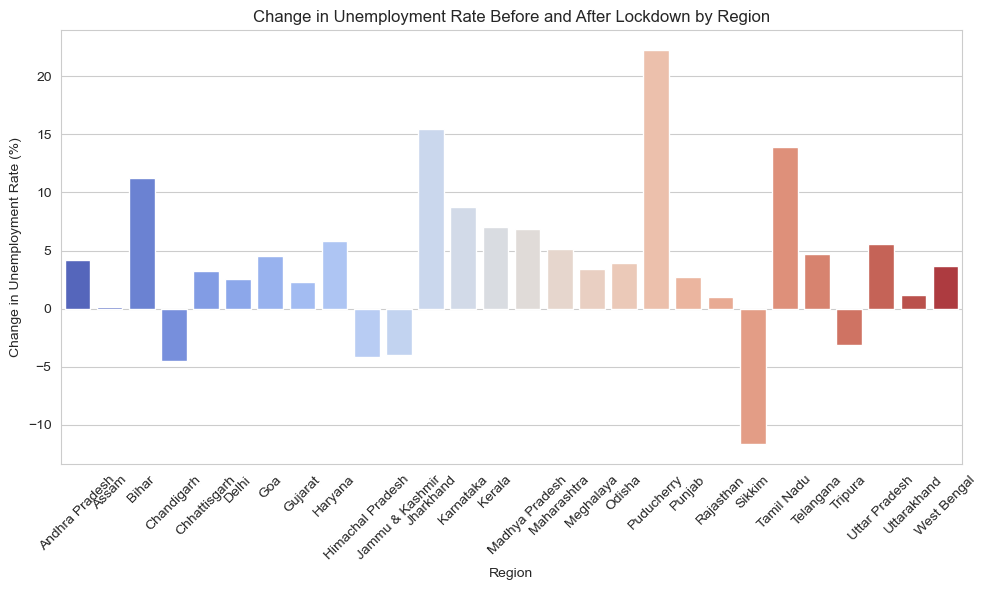

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'unemployment_comparison' DataFrame already contains the necessary data

# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the change in unemployment rate as a bar plot
sns.barplot(x='Region', y='Change in Unemployment Rate', data=unemployment_comparison, palette='coolwarm')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Change in Unemployment Rate (%)')
plt.title('Change in Unemployment Rate Before and After Lockdown by Region')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [201]:
af_lockdown = after_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

unemployment_comparison = before_lockdown.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
unemployment_comparison[' Estimated Unemployment Rate (%) before lockdown'] = af_lockdown[' Estimated Unemployment Rate (%)']

unemployment_comparison.columns = ['region','unemployment rate before lockdown','unemployment rate after lockdown']
unemployment_comparison.head()

,region,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,6.243333,10.433333
1,Assam,6.480000,6.652727
2,Bihar,14.276667,25.475833
3,Chandigarh,19.366667,14.850000
4,Chhattisgarh,8.683333,11.893333


In [202]:

# Clean up column names by stripping any extra spaces
df.columns = df.columns.str.strip()

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Define lockdown period
lockdown_start = pd.to_datetime('2020-03-24')
lockdown_end = pd.to_datetime('2020-06-30')

# Filter the data before and after the lockdown
before_lockdown = df[df['Date'] < lockdown_start]
after_lockdown = df[df['Date'] > lockdown_end]

# Calculate average unemployment rates before and after lockdown
avg_unemployment_before = before_lockdown['Estimated Unemployment Rate (%)'].mean()
avg_unemployment_after = after_lockdown['Estimated Unemployment Rate (%)'].mean()

# Print the results
print(f"Average Unemployment Rate Before Lockdown: {avg_unemployment_before:.2f}%")
print(f"Average Unemployment Rate After Lockdown: {avg_unemployment_after:.2f}%")


Average Unemployment Rate Before Lockdown: 9.51%
Average Unemployment Rate After Lockdown: nan%
